<a href="https://colab.research.google.com/github/nachodelis/AA_PRACTICA1_GRUPO_4/blob/main/AA_PRACTICA2_GRUPO_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Grupo 4

Luis Ignacio de Lis Guijarro

Carlos Ocón Garay


**REDES CONVULACIONALES**

Utilizaremos la biblioteca Python Keras para reconocer y clasificar imágenes de ropa en sus diferentes tipologías. Este modelo será definido, configurado, entrenado, evaluado y mejorado para posteriormente usarlo para hacer predicciones.

In [1]:
#importamos keras
%tensorflow_version 2.x

import tensorflow as tf
from tensorflow import keras
from keras import models
from keras import layers

print(tf.__version__)

2.7.0


In [2]:
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
from tensorflow.keras import Sequential
import numpy as np
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten



*   Usaremos el conjunto de datos Fashion-MNIST —también precargado en Keras y muy parecido a los que hicimos en clase en cuanto a la preparación requerida de los datos— para poder centrarnos en los pasos relacionados con el modelo.


*   Sabemos que Fashion-MNIST100 es un conjunto de 70K imágenes en escala de grises en 10 categorías.

*   Las imágenes tienen dimensiones (28 x 28) píxeles con valores de 0 a 255 (escala de grises) y usaremos 60K imágenes para entrenar la red y 10K imágenes para evaluar la precisión con la que la red aprende a clasificarlas.




In [3]:
#importamos lass imagenes y las separamos en train y test
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
mostrarimagenes=train_images




*   La carga del conjunto de datos devuelve cuatro matrices NumPy.ç


*   Las matrices train_images y train_labels son el conjunto de entrenamiento.
*   Las matrices test_images y test_labels son el conjunto de prueba para evaluar la precisión del modelo.


*   Las etiquetas son una matriz de enteros, que van de 0 a 9. Estos corresponden a la clase de ropa que representa la imagen:









In [4]:
print(train_images.shape)
print(train_images[1])
print(train_labels[1])


(60000, 28, 28)
[[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168
  133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217
  215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201
  201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200
  200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252
  248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51
   63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71
   49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 243 139 255 174 251 255
  205   0 215 217 214 208 220  95   0   0]
 [  0   0   0  45 226 214 214 215 224 205   0  4

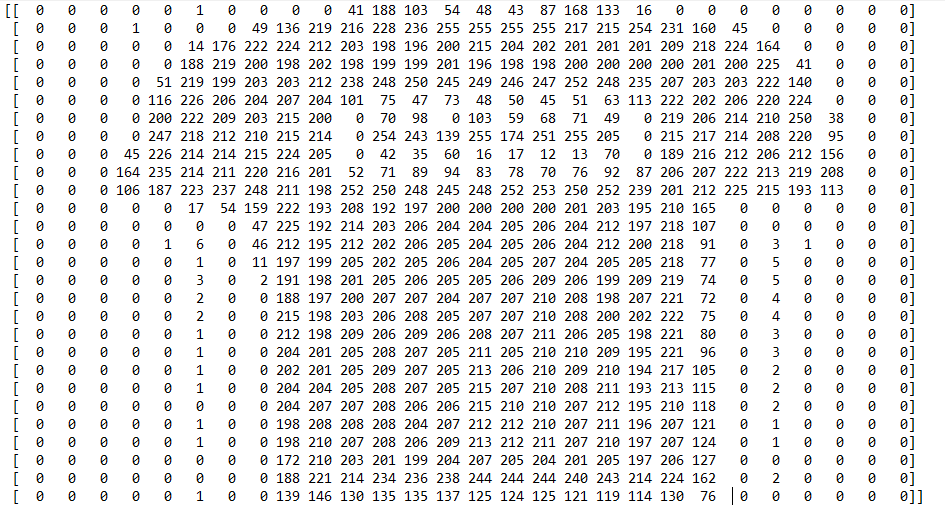

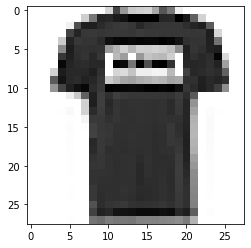

In [5]:
imagen = train_images[1]
plt.imshow(imagen, cmap=plt.cm.binary)
plt.show()

##La ropa viene asignada con las siguientes etiquetas:

0.   Camiseta
1.   Pantalón
2.   Jersey
3.   Vestido
4.   Cazadora
5.   Sandalia
6.   Camisa
7.   Zapatillas
8.   Bolso
9.   Bota

Asignaremos estos valores a un vector

In [6]:
class_names=["Camiseta","Pantalon","Jersey","Vestido","Cazadora","Sandalia","Camisa","Zapatillas","Bolso","Bota"]
class_names=np.array(class_names)
print(class_names.shape)

(10,)


#PROCESAMIENTO DE LOS DATOS


Escalamos los valores de entrada en el rango 0-1 y comprobamos que los datos tienen la forma esperada

In [7]:
print (train_images.shape)
print (train_labels.shape)
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255



print (train_images.shape)
print (train_labels.shape)

(60000, 28, 28)
(60000,)
(60000, 28, 28, 1)
(60000,)


###Funciones para mostrar las imagenes y sus gráficas

In [8]:
def plot_image(i,predictions_array, true_label,img):
  predictions_array, true_label, img = predictions_array, true_label[i],img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img,cmap=plt.cm.binary)


  predicted_label = np.argmax(predictions_array)

  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
                                       color=color)

In [9]:
def plot_value_array(i, predictions_array,true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10),predictions_array, color="red")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array,)
  thisplot[predicted_label].set_color('green')

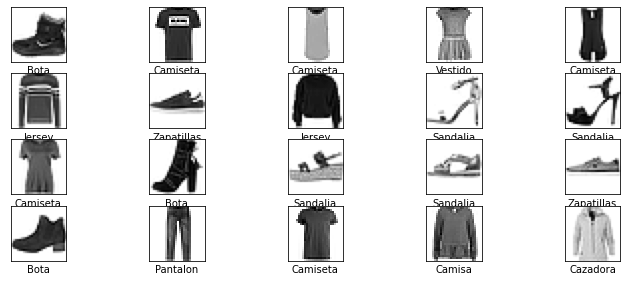

In [11]:
plt.figure(figsize=(12,12))
for i in range(20):
  plt.subplot(10,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(mostrarimagenes[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()
 

#Definición de modelos

Se crean vectores para los distintos casos de las redes convolucionales que se van a generar:

In [12]:
casos = 3
filtroscapa1 = [32, 64, 64]
tamanoventana1 = [(5,5), (7,7), (7,7)]
funcionactivacion1 = ['relu', 'relu', 'relu']
pooling1 =[(2,2) ,(2,2) ,(2,2)]
filtroscapa2 = [64 ,128, 128]
tamanoventana2 = [(5,5), (7,7), (7,7)]
funcionactivacion2 = ['relu' ,'relu', 'relu']
pooling2 =[(2,2) ,(2,2) ,(2,2)]
funcionpenultimaflatten = ['relu','relu','relu']
neuronaspenultimaflatten = [10,65,65]
funcionultimaflatten = ['softmax', 'softmax','softmax']
neuronasultimaflatten = [10,10,10]
optimizador = ['sgd', 'sgd', 'adam']
perdida = ['sparse_categorical_crosentropy']
metrica = ['accuracy']
epocas = [5,5,5]
models=[]


In [13]:

for caso in range(casos):
  print("Red Convolucional",caso + 1)
  print("---------------------------------")

  model = Sequential()
  model.add(Conv2D(filtroscapa1[caso],tamanoventana1[caso],activation='relu',input_shape=(28,28,1),name='capa1'))
  model.add(MaxPooling2D(pooling1[caso]))
  model.add(Conv2D(filtroscapa2[caso], tamanoventana2[caso], activation='relu',name='Capa2'))
  model.add(MaxPooling2D(pooling2[caso]))
  model.add(Flatten())
  if caso > 0:
     model.add(Dense(neuronaspenultimaflatten[caso], activation=funcionpenultimaflatten[caso]))
  
  model.add(Dense(neuronasultimaflatten[caso], activation=funcionultimaflatten[caso]))
  models.append(model)
  model.summary()

Red Convolucional 1
---------------------------------
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 capa1 (Conv2D)              (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 Capa2 (Conv2D)              (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 d

A través de summary podemos observar con detalle las capas y neuronas de la red, al igual que los parametros de cada una. En las dos últimas al implementar una capa mas y aumentar el número de neuronas, obtenemos una mayor cantidad de parametros a entrenar.

#Configuración de modelos
Asignamos los valores de compilación:

In [14]:
for caso in range(casos):
  models[caso].compile(optimizer=optimizador[caso], loss='sparse_categorical_crossentropy', metrics=['accuracy'])

La función de perdida dirige el entrenamiento, el optimizador actualiza los parámetros y la métrica monitoriza los pasos de entrenamiento.

#Entrenamiento

Con los modelos contruidos, podemos empezar a entrenarlos a partir de nuestro set de datos y la función fit. Almacenaremos la perdida y la precisión de cada red en dos vectores (test_loss y test_acc).

In [15]:
test_loss = []
test_acc = []

for caso in range(casos):
  print("Red Convolucional",caso + 1)
  print("---------------------------------")
  print("FILTROS PRIMERA CAPA: ",filtroscapa1[caso])
  print("TAMAÑO VENTANA PRIMERA CAPA: ",tamanoventana1[caso])
  print("FUNCIÓN ACTIVACIÓN PRIMERA CAPA: ",funcionactivacion1[caso])
  print("POOLING PRIMERA CAPA: ", pooling1[caso])
  print("FILTROS SEGUNDA CAPA: ",filtroscapa2[caso])
  print("TAMAÑO VENTANA SEGUNDA CAPA: ",tamanoventana2[caso])
  print("FUNCIÓN ACTIVACIÓN SEGUNDA CAPA: ",funcionactivacion2[caso])
  print("POOLING SEGUNDA CAPA: ", pooling2[caso])
  if caso > 0:
    print("FUNCION PENULTIMA FLATTEN: ", funcionpenultimaflatten[caso])
    print("NEURONAS PENULTIMA FLATTEN: ", neuronaspenultimaflatten[caso])
  print("FUNCION ULTIMA FLATTEN: ", funcionultimaflatten[caso])
  print("NEURONAS ULTIMA FLATTEN: ", neuronasultimaflatten[caso])
  print("OPTIMIZADOR: ",optimizador[caso])
  print("FUNCIÓN PÉRDIDA: SPARSE_CATEGORICAL_CROSSENTROPY")
  print("MÉTRICA: ACCURACY")
  print("---------------------------------")
  models[caso].fit(train_images, train_labels, batch_size=100, epochs=epocas[caso],verbose=1)
  test_loss.append(models[caso].evaluate(test_images,  test_labels)[0])
  test_acc.append(models[caso].evaluate(test_images,  test_labels)[1])
  print("\n\n")

Red Convolucional 1
---------------------------------
FILTROS PRIMERA CAPA:  32
TAMAÑO VENTANA PRIMERA CAPA:  (5, 5)
FUNCIÓN ACTIVACIÓN PRIMERA CAPA:  relu
POOLING PRIMERA CAPA:  (2, 2)
FILTROS SEGUNDA CAPA:  64
TAMAÑO VENTANA SEGUNDA CAPA:  (5, 5)
FUNCIÓN ACTIVACIÓN SEGUNDA CAPA:  relu
POOLING SEGUNDA CAPA:  (2, 2)
FUNCION ULTIMA FLATTEN:  softmax
NEURONAS ULTIMA FLATTEN:  10
OPTIMIZADOR:  sgd
FUNCIÓN PÉRDIDA: SPARSE_CATEGORICAL_CROSSENTROPY
MÉTRICA: ACCURACY
---------------------------------
Epoch 1/5
600/600 [==============================] - 6s 8ms/step - loss: 1.3050 - accuracy: 0.5727
Epoch 2/5
600/600 [==============================] - 5s 8ms/step - loss: 0.6826 - accuracy: 0.7503
Epoch 3/5
600/600 [==============================] - 5s 8ms/step - loss: 0.5891 - accuracy: 0.7855
Epoch 4/5
600/600 [==============================] - 4s 7ms/step - loss: 0.5369 - accuracy: 0.8049
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.5044 - accuracy: 0.8207



Red

Se puede observar finalmente como la primera y la segunda red, obtienen una precisión de aproximadamente el 80%, mientras que nuestra última red, al implementar el optimizador 'adam', obtenemos un acierto de casi el 90%. Evaluando los modelos con nuestro set de prueba obtenemos de la primera red convolucional un acierto de 0.82, y una perdida de 0.5, en la segunda un acierto de 0.8 y perdida de 0.54, y en la última un acierto de 0.89 y una perdida de 0.29, llegando a las mismas conclusiones previamente dadas, el optimizador adam obtiene un mayor acierto y se refleja en los resultados.

#PERDIDA

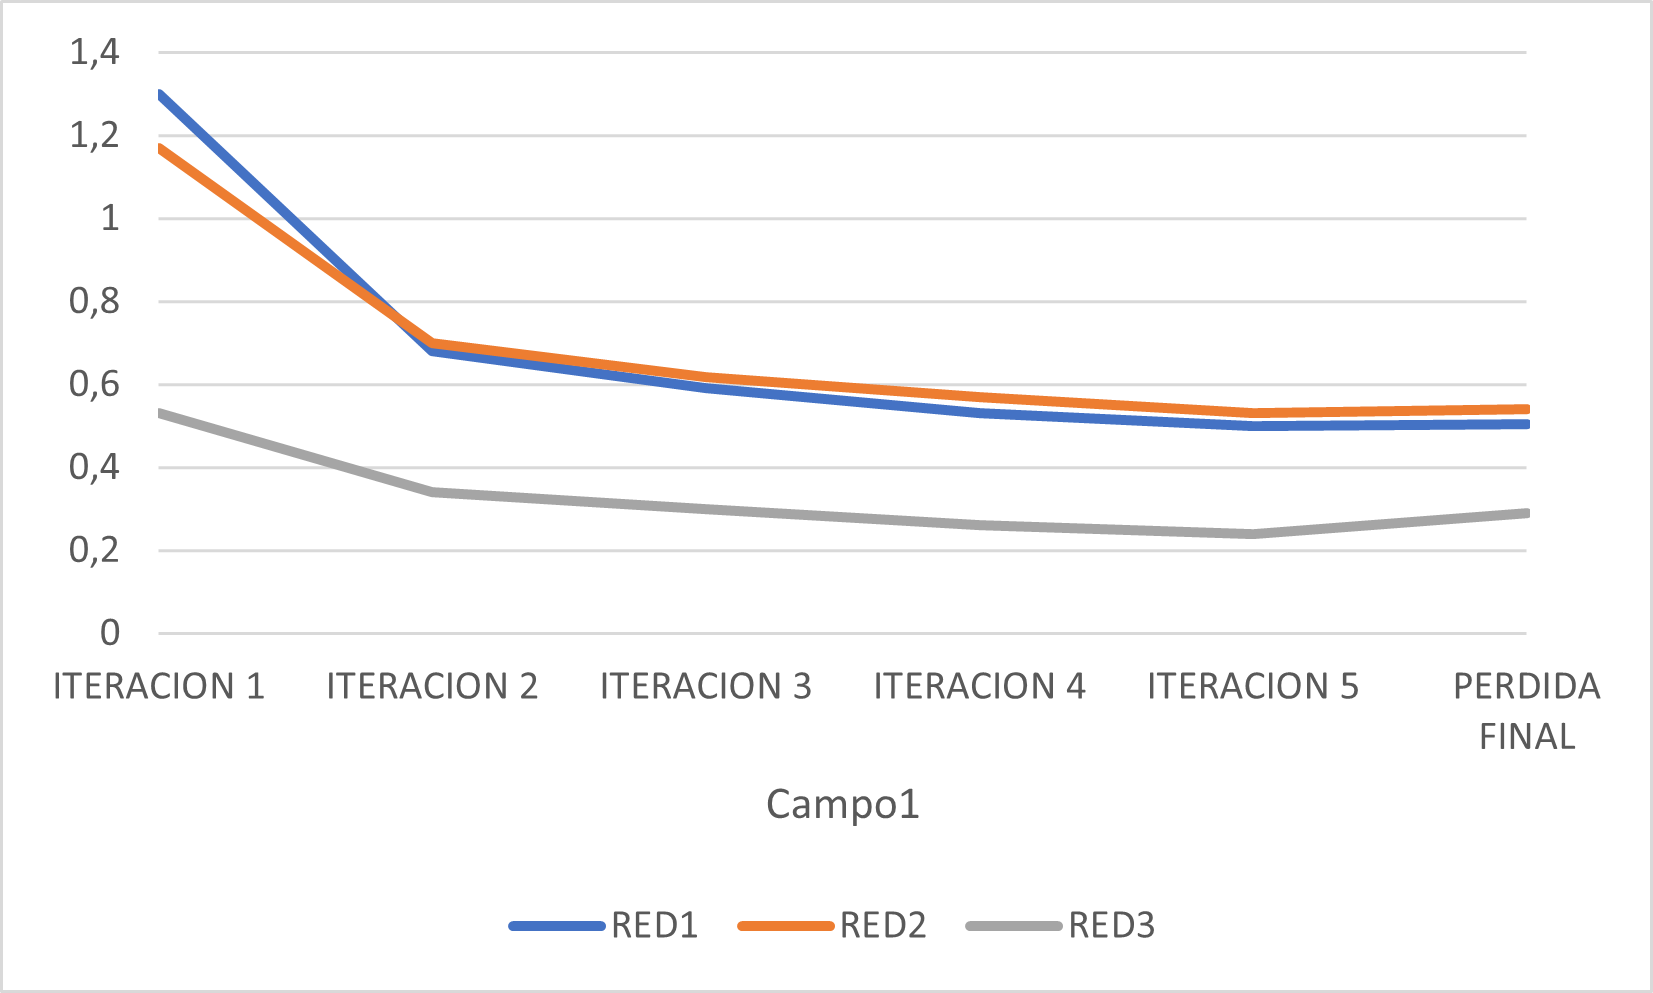

#PRECISIÓN

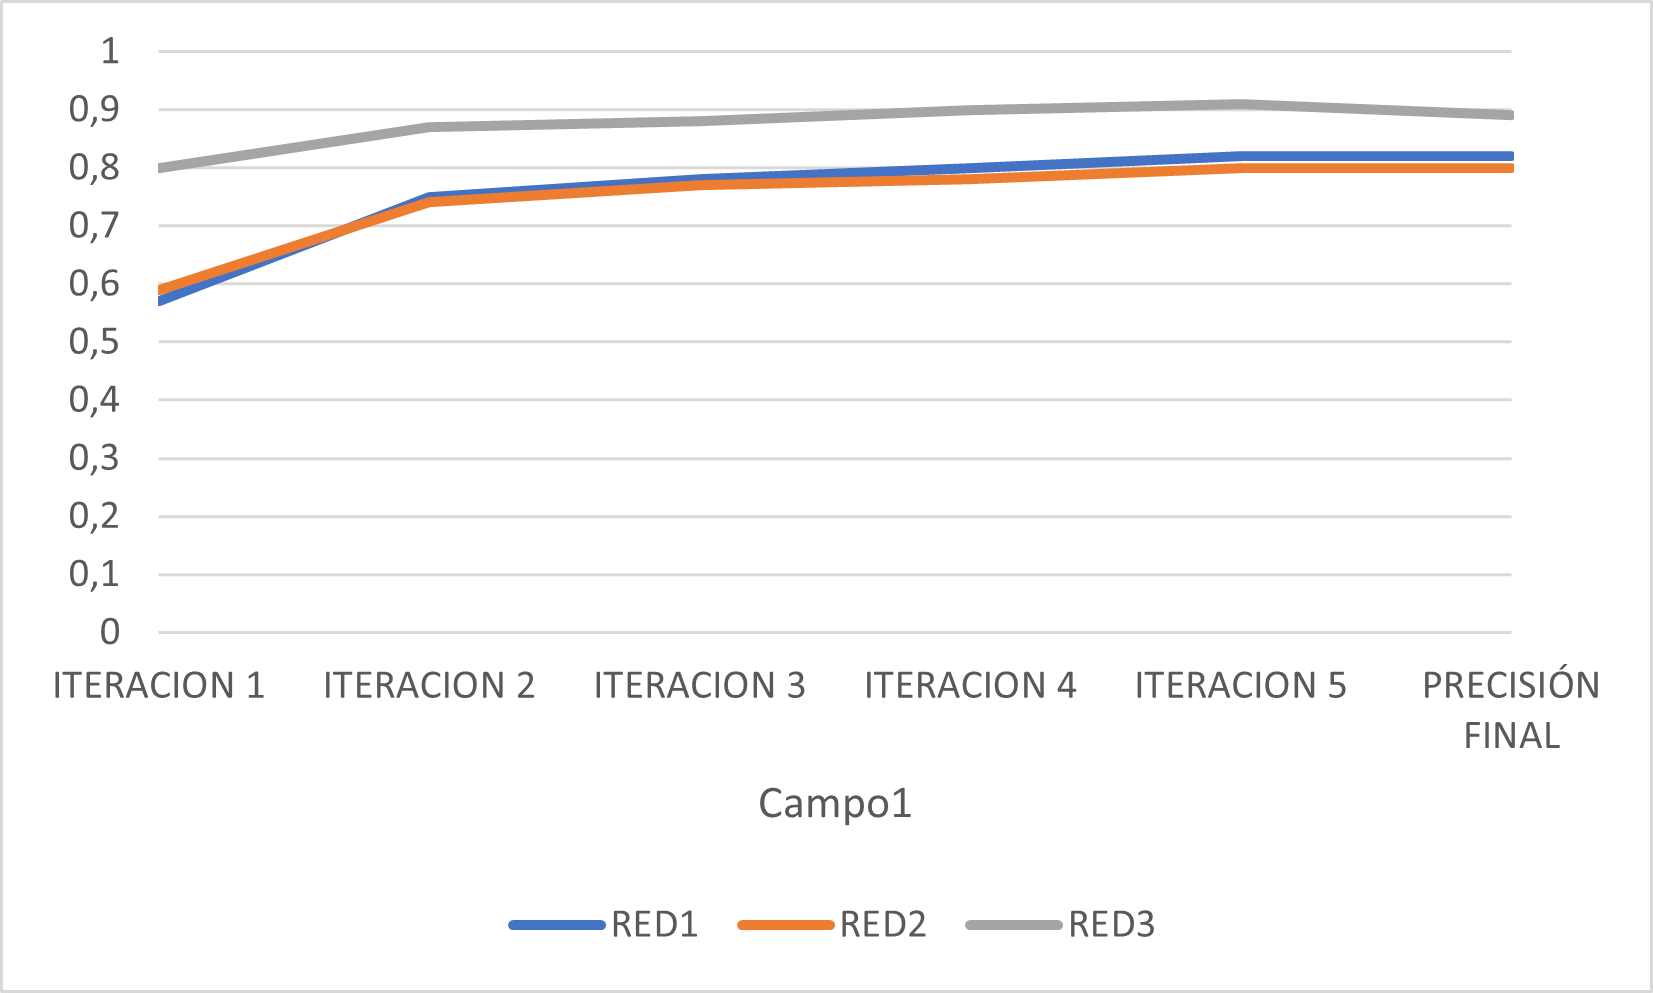

#CASO 1 25 EPOCAS

Implementamos los mismos datos pero con 25 épocas

In [16]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1),name='Capa1'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu',name='Capa2'))
model.add(MaxPooling2D((2, 2)))
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Capa1 (Conv2D)              (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 Capa2 (Conv2D)              (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1024)              0         
                                                                 
 dense_5 (Dense)             (None, 10)               

In [17]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model.fit(train_images, train_labels,
          batch_size=100,
          epochs=25,
          verbose=1)

test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

Epoch 1/25
600/600 [==============================] - 5s 8ms/step - loss: 1.1952 - accuracy: 0.5998
Epoch 2/25
600/600 [==============================] - 5s 8ms/step - loss: 0.6719 - accuracy: 0.7548
Epoch 3/25
600/600 [==============================] - 5s 8ms/step - loss: 0.5852 - accuracy: 0.7890
Epoch 4/25
600/600 [==============================] - 5s 8ms/step - loss: 0.5353 - accuracy: 0.8090
Epoch 5/25
600/600 [==============================] - 5s 8ms/step - loss: 0.5006 - accuracy: 0.8211
Epoch 6/25
600/600 [==============================] - 5s 8ms/step - loss: 0.4721 - accuracy: 0.8317
Epoch 7/25
600/600 [==============================] - 5s 8ms/step - loss: 0.4516 - accuracy: 0.8399
Epoch 8/25
600/600 [==============================] - 5s 8ms/step - loss: 0.4342 - accuracy: 0.8472
Epoch 9/25
600/600 [==============================] - 5s 8ms/step - loss: 0.4206 - accuracy: 0.8520
Epoch 10/25
600/600 [==============================] - 5s 8ms/step - loss: 0.4101 - accuracy: 0.8540

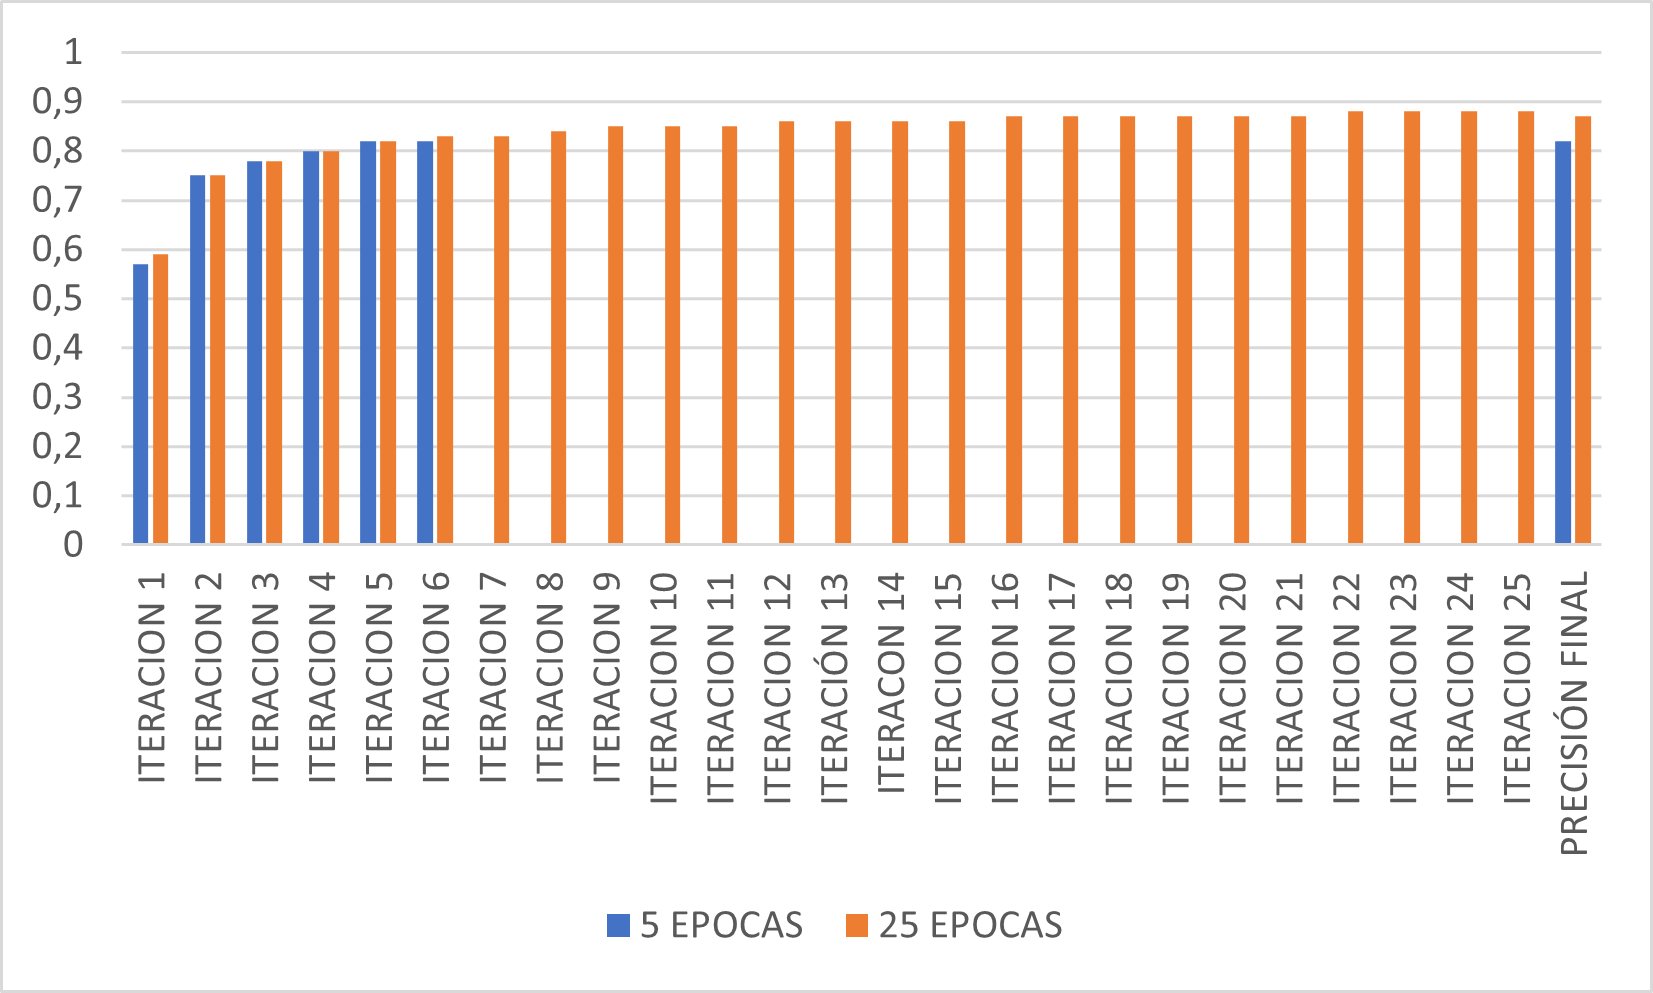

En el caso de 5 épocas, la red llega a una precisión del 80% con el entrenamiento, al igual que con los datos de test, en cambio, cuando aplicamos 25 épocas, la red llega a una precisión de casi el 90% (87,5%) de precisión, queriendo esto decir que la red ha sido mejorada. La perdida en 5 épocas se queda en 0.5, mientras que aplicando 25 épocas llega a bajar hasta 0.35


#CASO 1 TANH

Implementamos los mismos datos pero con función de activación 'tanh' para las capas convolucionales

In [18]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
model = Sequential()
model.add(Conv2D(32, (5, 5), activation='tanh', input_shape=(28, 28, 1),name='Capa1'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (5, 5), activation='tanh',name='Capa2'))
model.add(MaxPooling2D((2, 2)))
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Capa1 (Conv2D)              (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 Capa2 (Conv2D)              (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 1024)              0         
                                                                 
 dense_6 (Dense)             (None, 10)               

In [19]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model.fit(train_images, train_labels,
          batch_size=100,
          epochs=5,
          verbose=1)

test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

Epoch 1/5
600/600 [==============================] - 5s 8ms/step - loss: 1.1031 - accuracy: 0.6463
Epoch 2/5
600/600 [==============================] - 5s 8ms/step - loss: 0.6563 - accuracy: 0.7600
Epoch 3/5
600/600 [==============================] - 4s 7ms/step - loss: 0.5754 - accuracy: 0.7888
Epoch 4/5
600/600 [==============================] - 4s 7ms/step - loss: 0.5285 - accuracy: 0.8078
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.5022 - accuracy: 0.8189
Test accuracy: 0.8188999891281128


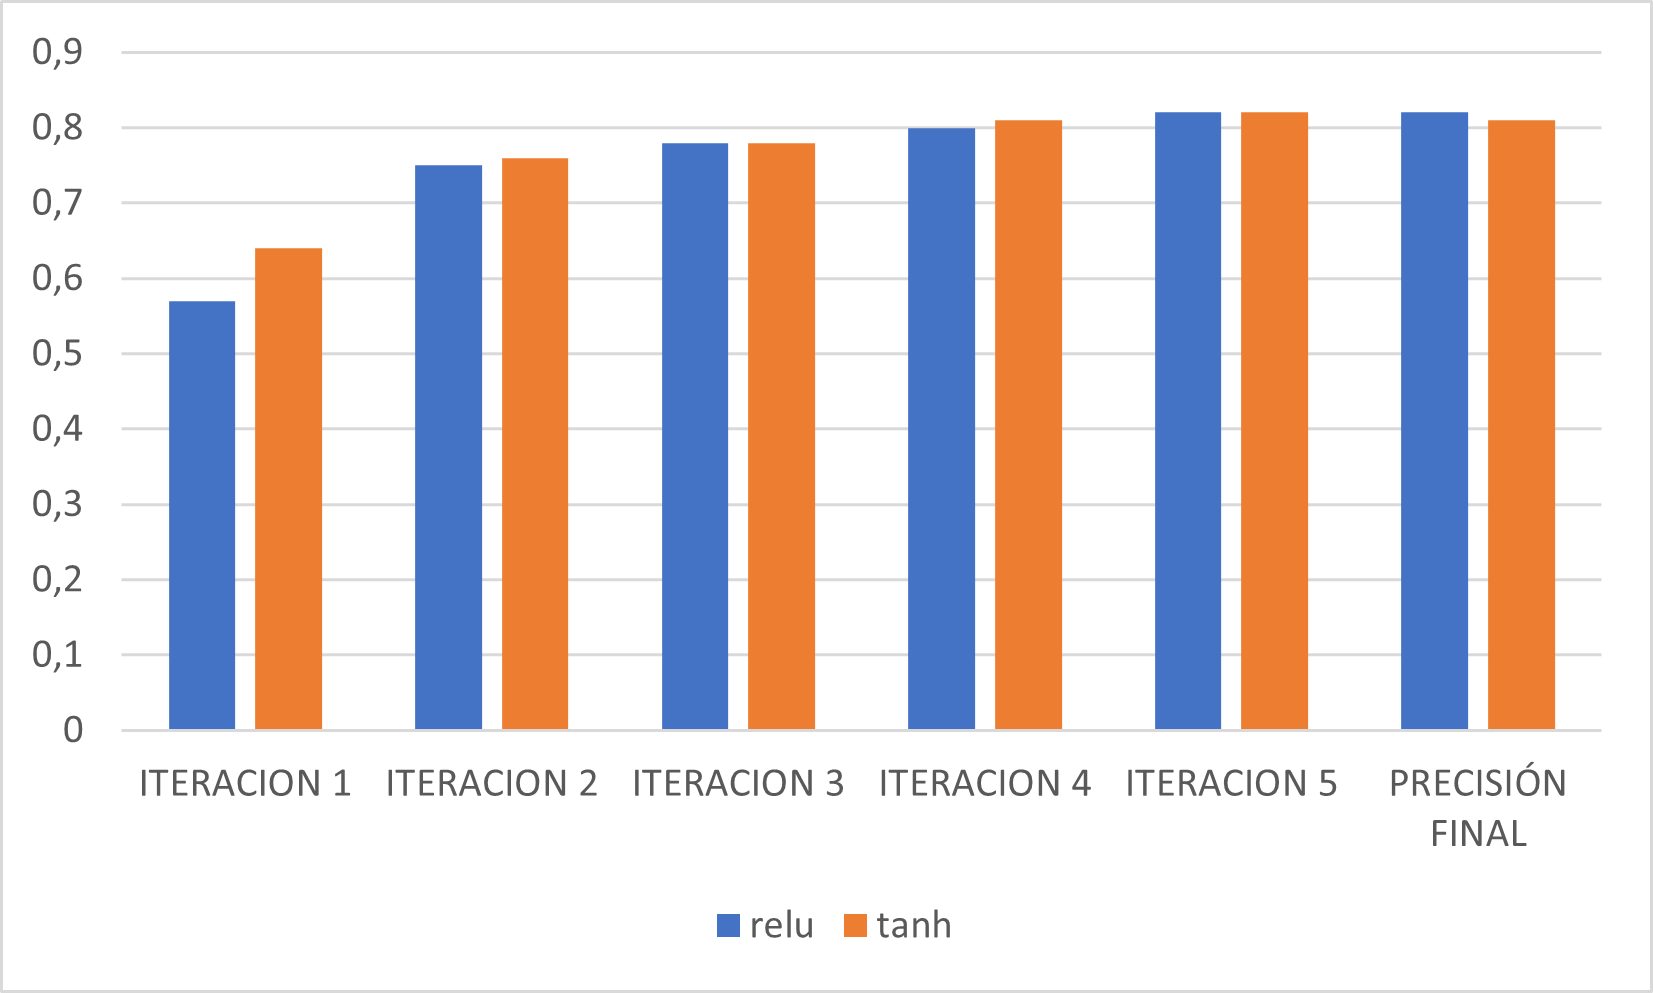

Observamos como no hay practicamente cambio ni en la precisión ni en la función de perdida

#PREDICCIÓN DE LA 6ª IMAGEN
Se utilizarán las tres redes y compararemos los resultados que se obtienen de cada una de ellas:

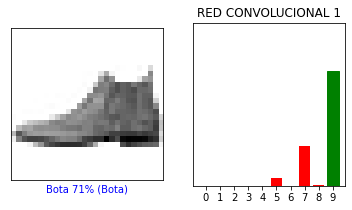

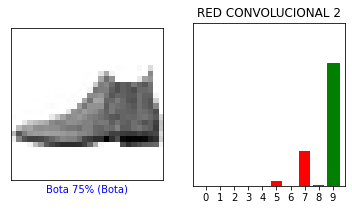

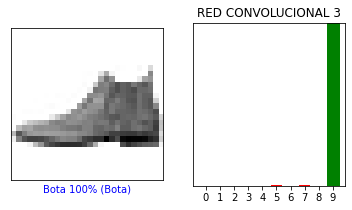

In [43]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(predtrain_images, predtrain_labels), (predtest_images, predtest_labels) = fashion_mnist.load_data()
imagen6 = predtest_images[0]
predtrain_images = predtrain_images.reshape((60000, 28 , 28,1))
predtest_images = predtest_images.reshape((10000, 28 , 28,1))

predtrain_images = predtrain_images.astype('float32') / 255
predtest_images = predtest_images.astype('float32') / 255

from keras.utils.np_utils import to_categorical


predtest_labels = to_categorical(predtest_labels)
for caso in range(casos):
  
  
  predictions = models[caso].predict(predtest_images)

  np.sum(predictions[0])
  i = 0
  plt.figure(figsize=(6,3))
  plt.title('RED CONVOLUCIONAL %i' %num)
  plt.subplot(1,2,1)
  plot_image(i,predictions[i],test_labels,test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i,predictions[i], test_labels)
  num = caso + 1
  plt.title('RED CONVOLUCIONAL %i' %num)
  plt.show

  print("\n\n")


Podemos observar como las conclusiones anteriores se reflejan en las tres gráficas. A pesar de que las tres redes han acertado la prenda de la imagen, la tercera red ha mostrado un 100% de posibilidades frente a un 71 y 75 de la primera y la segunda.

#Analisis de las 14 primeras imágenes:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


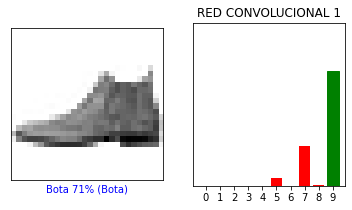

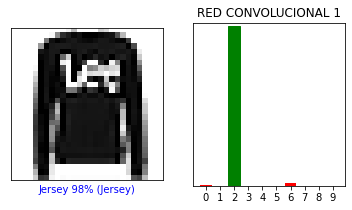

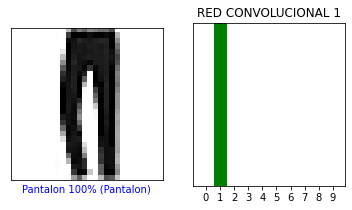

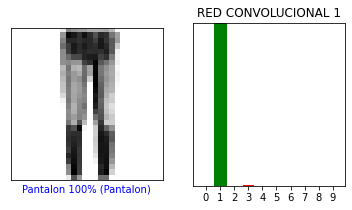

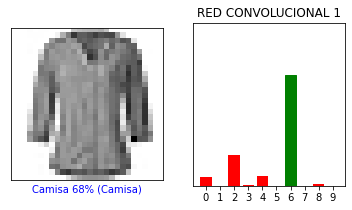

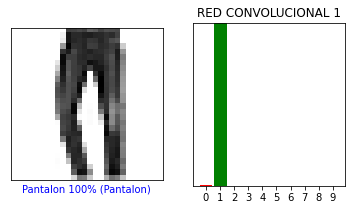

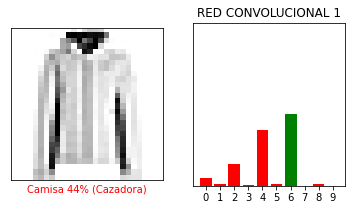

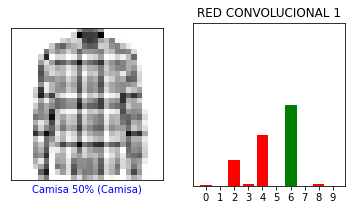

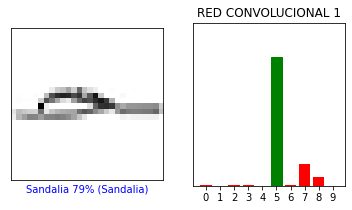

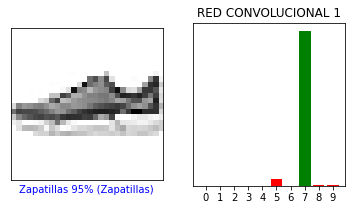

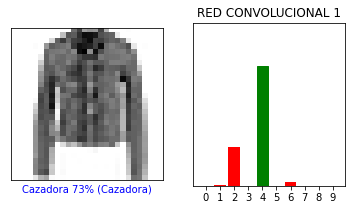

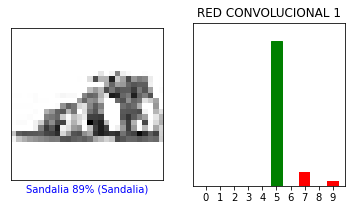

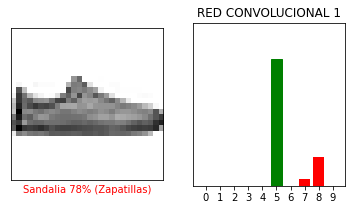

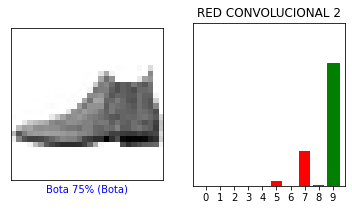

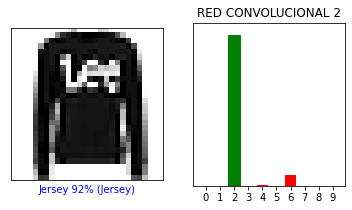

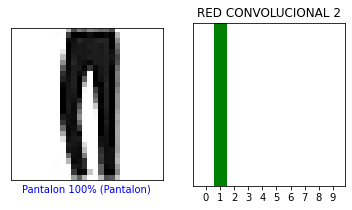

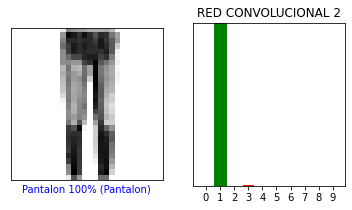

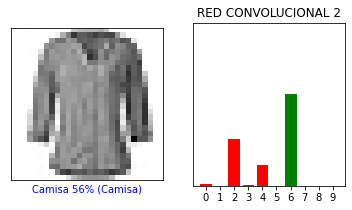

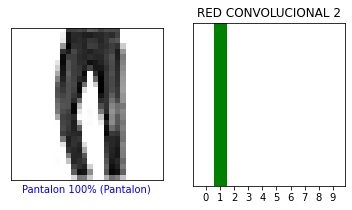

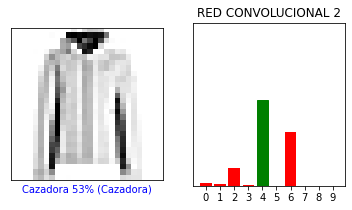

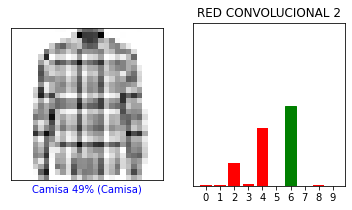

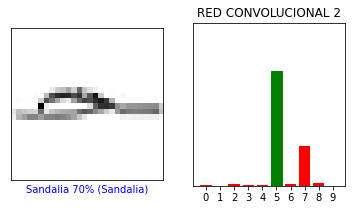

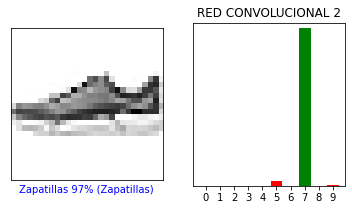

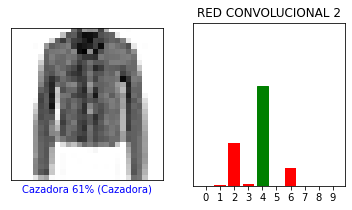

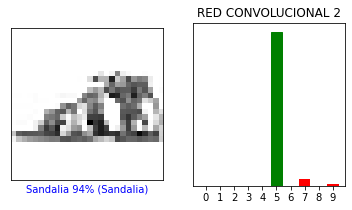

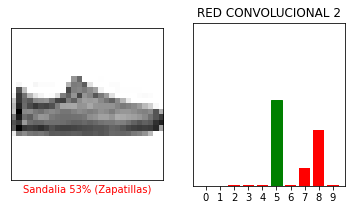

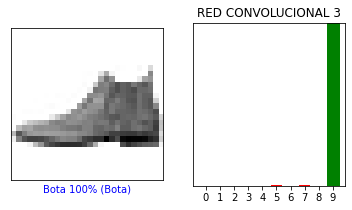

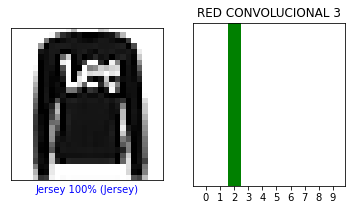

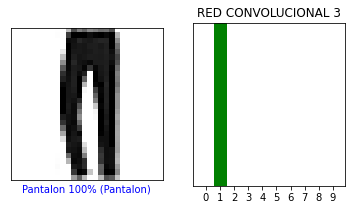

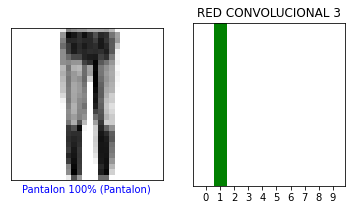

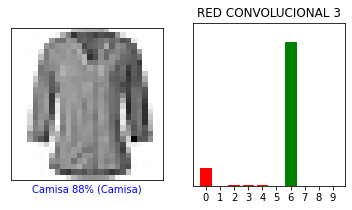

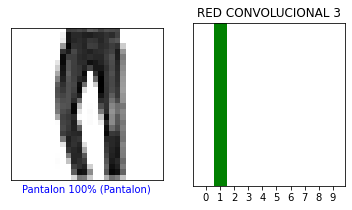

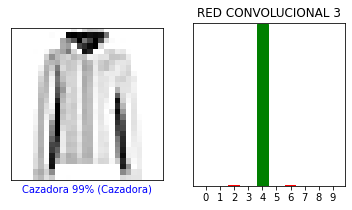

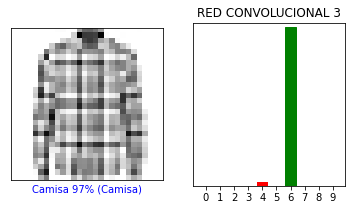

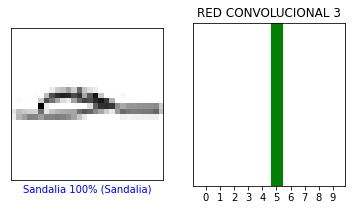

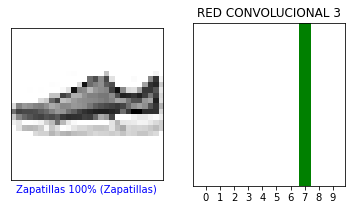

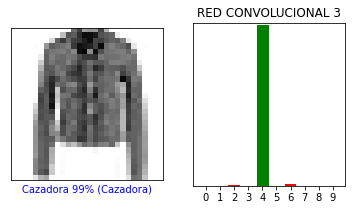

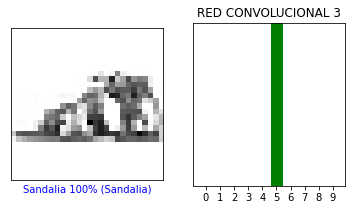

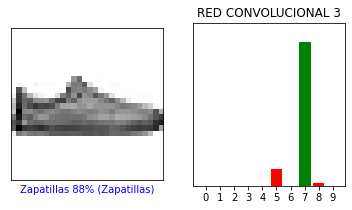

In [45]:
for caso in range(casos):
  predictions = models[caso].predict(predtest_images)
  

  np.sum(predictions[caso])

  for i in range (0,13):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i,predictions[i],test_labels,test_images.reshape(10000,28,28))
    plt.subplot(1,2,2)
    plot_value_array(i,predictions[i], test_labels)
    num = caso + 1
    plt.title('RED CONVOLUCIONAL %i' %num)
    plt.show
    
  print("\n\n")
  
  
    
    

La primera red dentro de las 14 primeras imagenes acierta todas menos dos, la cazadora dandole el valor de ser una camisa, y las zapatillas, dandole el valor de sandalias. La segunda red solo falla las zapatillas, dandole el valor de sandalias, y nuestra última red no falla ninguna prenda, obteniendo la gran mayoría con un porcentaje bastante alto de probabilidad.

#Práctica 1 Capas Dense

Comparando resultados entre la primera prática y esta, podemos observar como dentro de los 8 casos de las redes neuronales en su mayoría no obtenían grán precisión, menos un par que llegaban a obtener casí un 90% de acierto. Las redes convolucionales en cambio, mínimo obtienen un 80% y como máximo un 90% habiendo hecho unicamente tres casos distintos.

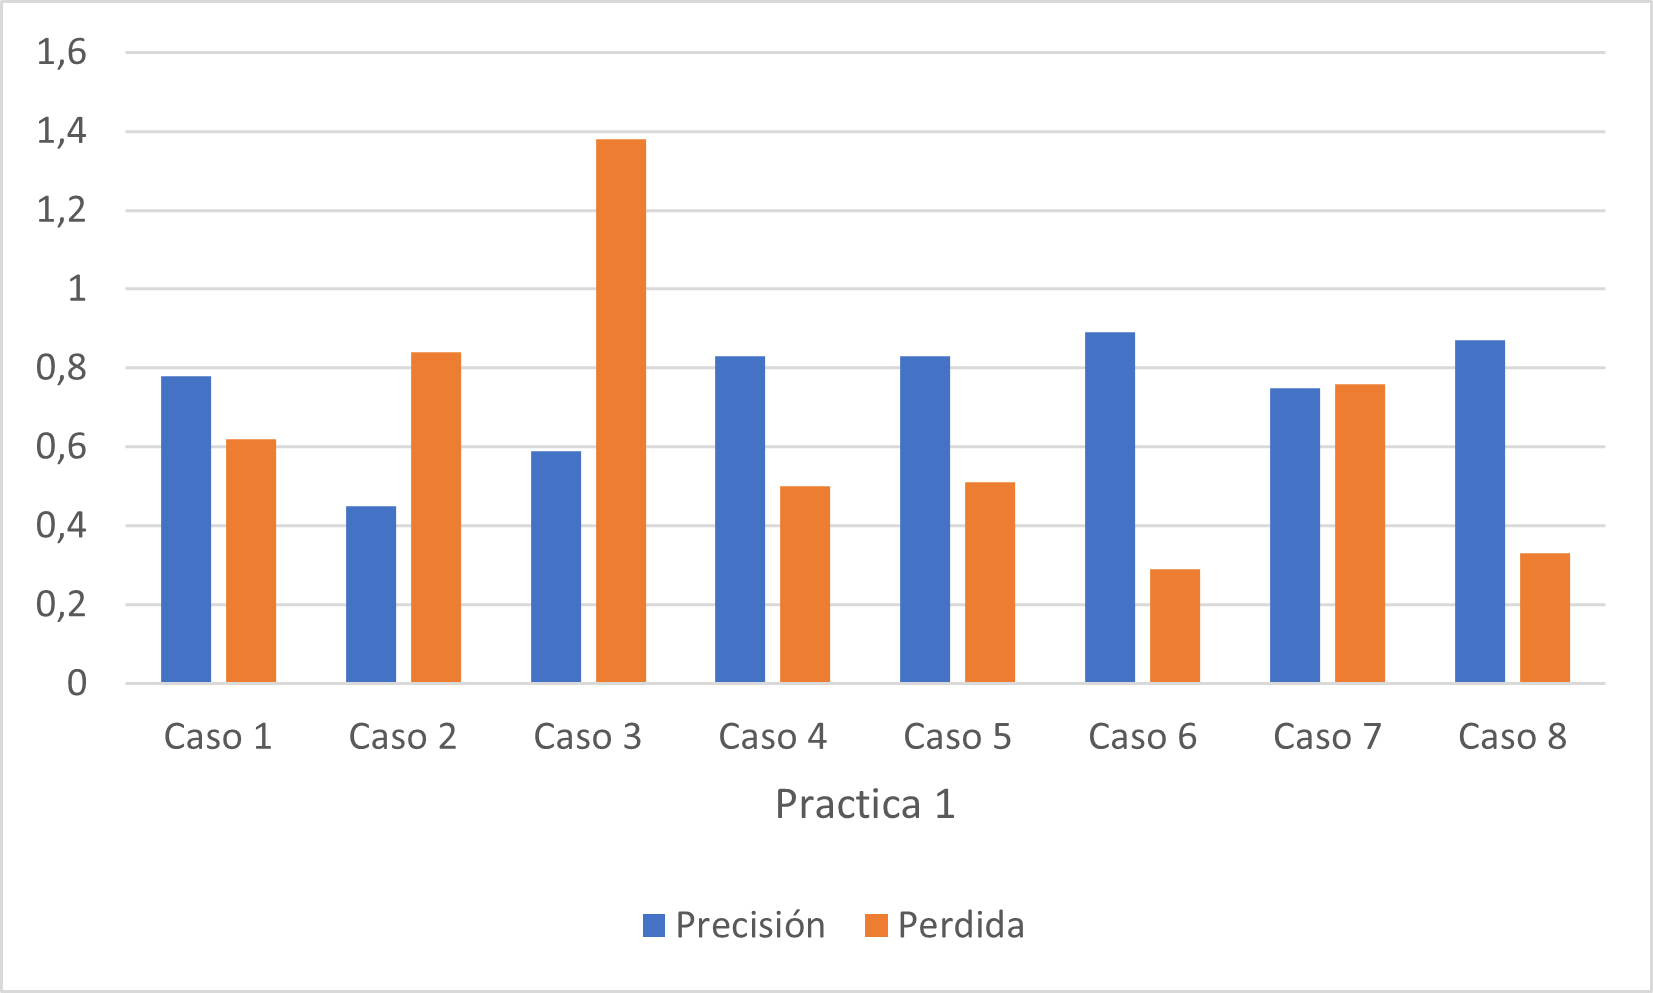

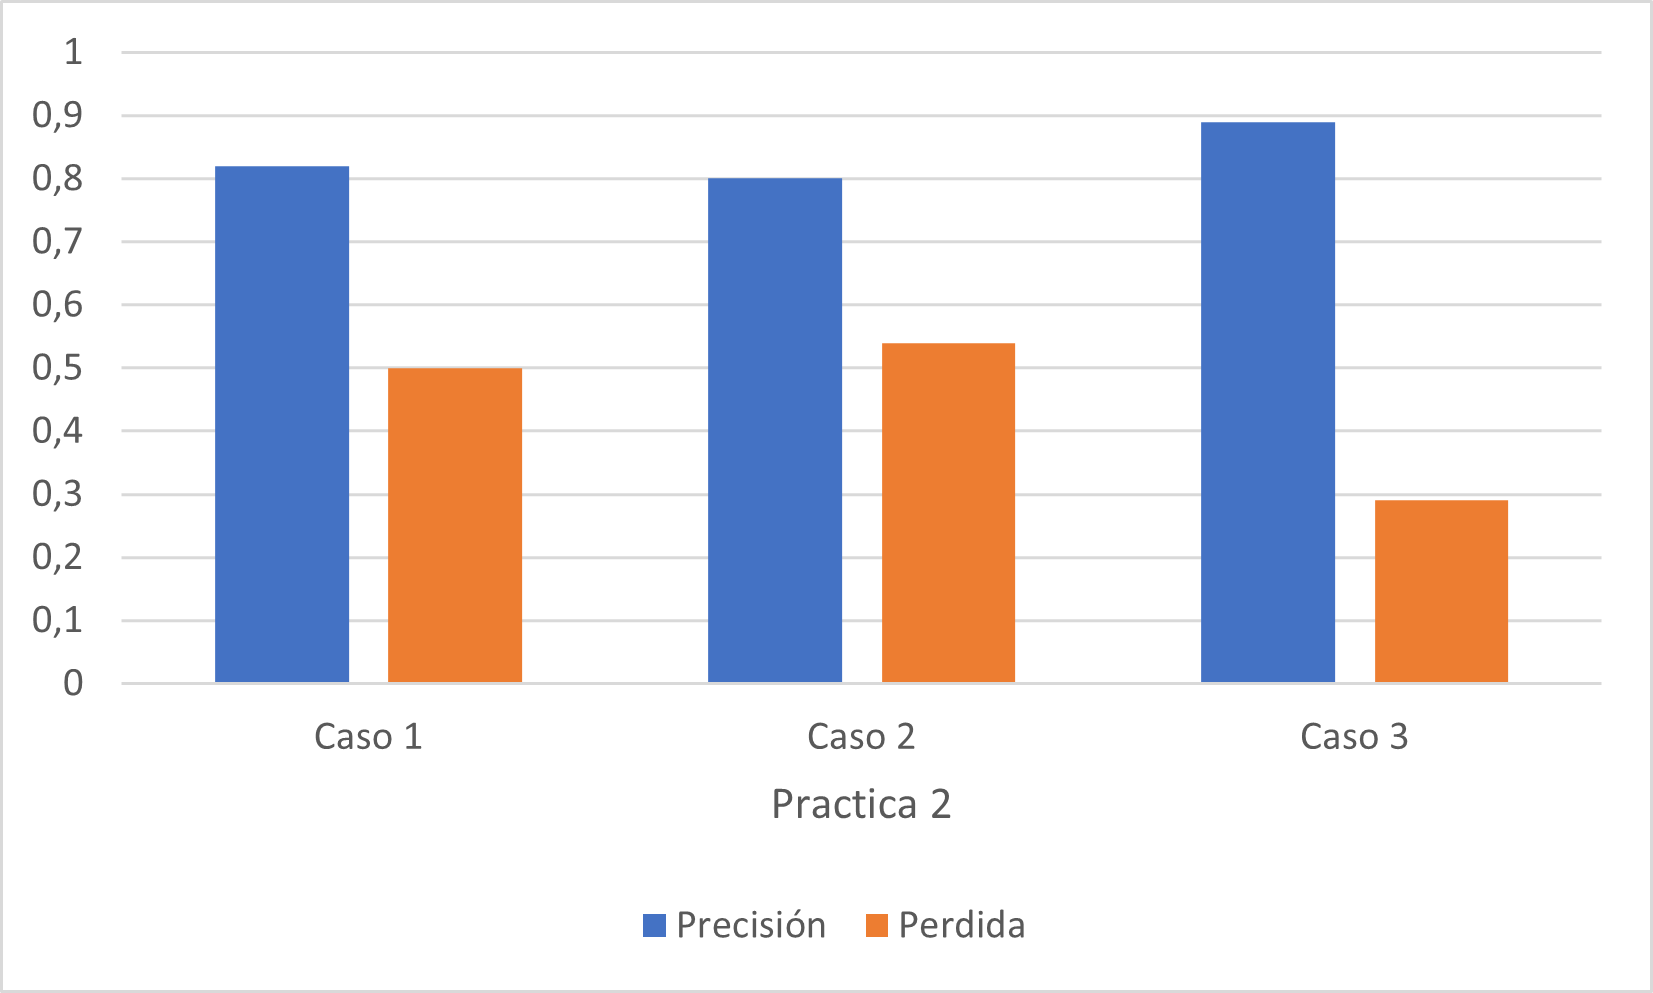

En conclusión, a traves de las gráficas y los testeos realizados con las distintas redes e imagenes, podemos llegar a que las redes convolucionales presentan una mayor precisión de los datos.